<a href="https://colab.research.google.com/github/PhamBaVuong/MachineLearning/blob/main/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression - Hồi quy Logistic

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[0 0 0 0 1 1 1 1 1 1]
[0 1]
[-1.04608067]
[[0.51491375]]
[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]
[0 0 0 1 1 1 1 1 1 1]
0.9
[[3 1]
 [0 6]]


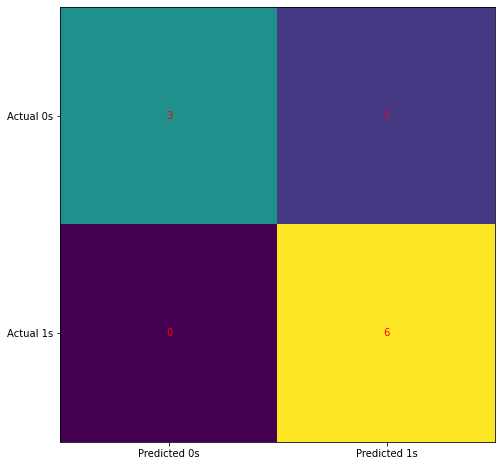

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10

[-3.51335372]
[[1.12066084]]
[[0.97106534 0.02893466]
 [0.9162684  0.0837316 ]
 [0.7810904  0.2189096 ]
 [0.53777071 0.46222929]
 [0.27502212 0.72497788]
 [0.11007743 0.88992257]
 [0.03876835 0.96123165]
 [0.01298011 0.98701989]
 [0.0042697  0.9957303 ]
 [0.00139621 0.99860379]]
[0 0 0 0 1 1 1 1 1 1]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [1]:
# Nhập gói, lớp
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Nhập dữ liệu
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
print (x)
print (y)

# Tạo mô hình, huấn luyện
model = LogisticRegression(solver = 'liblinear', random_state = 0)
model.fit(x, y)
# model = LogisticRegression(solver = 'liblinear', random_state = 0).fit(x, y)
print (model.classes_)
print (model.intercept_)
print (model.coef_)

# Đánh giá mô hình
print (model.predict_proba(x))
print (model.predict(x))
print (model.score(x, y))
print (confusion_matrix(y, model.predict(x)))
cm = confusion_matrix(y, model.predict(x))
fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm)
ax.xaxis.set(ticks = (0, 1), ticklabels = ('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks = (0, 1), ticklabels = ('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha = 'center', va = 'center', color = 'red')

plt.show()
print (classification_report(y, model.predict(x)))

model = LogisticRegression(solver = 'liblinear', C = 10.0, random_state = 0)
model.fit(x, y)

print (model.intercept_)
print (model.coef_)
print (model.predict_proba(x))
print (model.predict(x))
print (model.score(x, y))

confusion_matrix(y, model.predict(x))
print (classification_report(y, model.predict(x)))

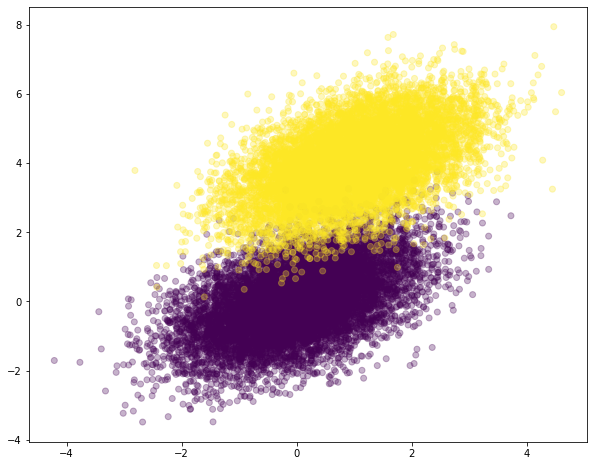

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# hàm sigmoid
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

# hàm ước lượng cực đại
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum(target * scores - np.log(1 + np.exp(scores)))
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack(intercept, features)
        weights = np.zeros(features.shape[1])
        
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
    
    if step % 10000 == 0:
        print (log_likelihood(features, target, weights))
        return weights

np.random.seed(10)
num_observations = 10000
x1 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, 0.5], [0.5, 1]], num_observations)
simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations), np.ones(num_observations)))
plt.figure(figsize = (10, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1], 
            c = simulated_labels, alpha = 0.3,)
plt.show()

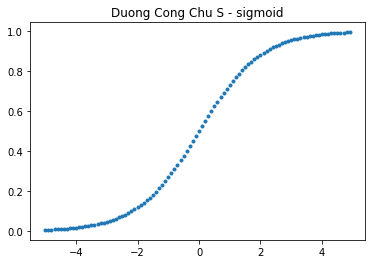

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

xs = [scores / 10.0 for scores in range(-50, 50)]
plt.plot(xs, [sigmoid(scores) for scores in xs], '.', label = 'Logistic Regression')
plt.title('Duong Cong Chu S - sigmoid')
plt.show()